# Initialize Snowflake Session using FosforML

In [72]:
from fosforml.model_manager.snowflakesession import get_session
my_session = get_session()

In [73]:
my_session.connection.database

'FDC_INSURANCE'

In [74]:
my_session.connection.schema

'INS_CLAIMS_RESERV_SCHEMA'

In [75]:
table_name = 'AUTO_INSURANCE_CLAIMS_DATA'

In [76]:
sf_df = my_session.sql("select * from {}".format(table_name))

In [77]:
type(sf_df)

snowflake.snowpark.dataframe.DataFrame

In [78]:
df = sf_df.to_pandas()

In [79]:
type(df)

pandas.core.frame.DataFrame

### Pandas is a software library written for the Python programming language for data manipulation and analysis. 
### In particular, it offers data structures and operations for manipulating numerical tables and time series.

## Top 5 rows of the dataframe/Table

In [80]:
df.head(5)

,MONTHS_AS_CUSTOMER,CUSTOMER_AGE,POLICY_NUMBER,POLICY_BIND_DATE,POLICY_STATE,POLICY_CSL,POLICY_DEDUCTABLE,POLICY_ANNUAL_PREMIUM,UMBRELLA_LIMIT,INSURED_ZIP,...,POLICE_REPORT_AVAILABLE,TOTAL_CLAIM_AMOUNT_PAID,INJURY_CLAIM,PROPERTY_CLAIM,VEHICLE_CLAIM,AUTO_MAKE,AUTO_MODEL,AUTO_YEAR,FRAUD_REPORTED,POLICY_BIND_DATE_CUSTOM
0,139,37,457069,17-08-2011,CT,250/500,1351,1589,16139812,609322,...,No Police Report Available,48182,538,20189,27455,Dodge,Neon,2005,No Fraud Reported,2011-08-17
1,292,52,429086,27-09-2010,CT,100/300,2216,2669,15406514,438830,...,Police Report Available,64579,11170,5093,48316,Audi,A3,1999,No Fraud Reported,2010-09-27
2,45,20,457562,13-01-2002,CT,100/300,929,1290,5629268,616164,...,No Police Report Available,32420,538,845,31037,Mercedes,E400,2014,No Fraud Reported,2002-01-13
3,49,67,471692,07-02-2012,CT,500/1000,699,970,18501194,445120,...,No Police Report Available,53780,7280,898,45602,Suburu,Legacy,2005,No Fraud Reported,2012-02-07
4,128,45,463009,18-06-2008,CT,100/300,1122,1384,16890664,442936,...,Police Report Available,94511,412,14545,79554,Ford,Escape,2013,No Fraud Reported,2008-06-18


In [81]:
df.shape

(232025, 41)

## Data Basic information

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232025 entries, 0 to 232024
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   MONTHS_AS_CUSTOMER           232025 non-null  int16 
 1   CUSTOMER_AGE                 232025 non-null  int8  
 2   POLICY_NUMBER                232025 non-null  object
 3   POLICY_BIND_DATE             232025 non-null  object
 4   POLICY_STATE                 232025 non-null  object
 5   POLICY_CSL                   232025 non-null  object
 6   POLICY_DEDUCTABLE            232025 non-null  int16 
 7   POLICY_ANNUAL_PREMIUM        232025 non-null  int16 
 8   UMBRELLA_LIMIT               232025 non-null  int32 
 9   INSURED_ZIP                  232025 non-null  object
 10  INSURED_SEX                  232025 non-null  object
 11  INSURED_EDUCATION_LEVEL      232025 non-null  object
 12  INSURED_OCCUPATION           232025 non-null  object
 13  INSURED_HOBBIE

## Data Description

In [83]:
df.describe()

,MONTHS_AS_CUSTOMER,CUSTOMER_AGE,POLICY_DEDUCTABLE,POLICY_ANNUAL_PREMIUM,UMBRELLA_LIMIT,CAPITAL_GAINS,CAPITAL_LOSS,NUMBER_OF_VEHICLES_INVOLVED,BODILY_INJURIES,WITNESSES,TOTAL_CLAIM_AMOUNT_PAID,INJURY_CLAIM,PROPERTY_CLAIM,VEHICLE_CLAIM
count,232025.000000,232025.000000,232025.000000,232025.000000,2.320250e+05,232025.000000,232025.00000,232025.000000,232025.000000,232025.000000,232025.000000,232025.000000,232025.000000,232025.000000
mean,126.727736,43.838483,1253.651365,1566.490792,1.040827e+07,47900.608447,-41154.24565,1.475707,0.996712,1.501437,67235.224006,7735.964607,8529.807297,50969.452102
std,91.088378,14.691610,535.036140,656.380264,5.916215e+06,27700.863866,23731.03404,0.701444,0.817630,1.115730,18857.753110,7150.694660,7865.621423,15683.462801
min,7.000000,19.000000,301.000000,430.000000,0.000000e+00,0.000000,-90200.00000,1.000000,0.000000,0.000000,21214.000000,300.000000,0.000000,20004.000000
25%,43.000000,31.000000,793.000000,996.000000,6.166324e+06,23826.000000,-61635.00000,1.000000,0.000000,1.000000,53423.000000,524.000000,1024.000000,37614.000000
50%,111.000000,44.000000,1250.000000,1569.000000,1.075463e+07,48076.000000,-41330.00000,1.000000,1.000000,2.000000,67742.000000,6062.000000,6209.000000,50927.000000
75%,197.000000,57.000000,1698.000000,2134.000000,1.537261e+07,71699.000000,-20555.00000,2.000000,2.000000,2.000000,81082.000000,14017.000000,15316.000000,64362.000000
max,326.000000,69.000000,2430.000000,2700.000000,1.999986e+07,96000.000000,0.00000,4.000000,2.000000,3.000000,121412.000000,21899.000000,26432.000000,81998.000000


In [84]:
df.columns

Index(['MONTHS_AS_CUSTOMER', 'CUSTOMER_AGE', 'POLICY_NUMBER',
       'POLICY_BIND_DATE', 'POLICY_STATE', 'POLICY_CSL', 'POLICY_DEDUCTABLE',
       'POLICY_ANNUAL_PREMIUM', 'UMBRELLA_LIMIT', 'INSURED_ZIP', 'INSURED_SEX',
       'INSURED_EDUCATION_LEVEL', 'INSURED_OCCUPATION', 'INSURED_HOBBIES',
       'INSURED_RELATIONSHIP', 'CAPITAL_GAINS', 'CAPITAL_LOSS',
       'INCIDENT_DATE', 'INCIDENT_TYPE', 'COLLISION_TYPE', 'INCIDENT_SEVERITY',
       'AUTHORITIES_CONTACTED', 'INCIDENT_STATE', 'INCIDENT_CITY',
       'INCIDENT_LOCATION', 'INCIDENT_HOUR_OF_THE_DAY', 'INCIDENT_TIME_OF_DAY',
       'NUMBER_OF_VEHICLES_INVOLVED', 'PROPERTY_DAMAGE', 'BODILY_INJURIES',
       'WITNESSES', 'POLICE_REPORT_AVAILABLE', 'TOTAL_CLAIM_AMOUNT_PAID',
       'INJURY_CLAIM', 'PROPERTY_CLAIM', 'VEHICLE_CLAIM', 'AUTO_MAKE',
       'AUTO_MODEL', 'AUTO_YEAR', 'FRAUD_REPORTED', 'POLICY_BIND_DATE_CUSTOM'],
      dtype='object')

## Moving to a Dummy Dataset for Feature Engineering and Model training

In [85]:
import pandas as pd

In [86]:
df = pd.read_csv("Housing.csv")

In [87]:
df.shape

(545, 13)

In [88]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [90]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [91]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [92]:
df.duplicated().sum()

0

### Correlation is a way to describe how two things are related to each other. 
### When two things are correlated, it means that changes in one thing are associated with changes in the other.
### For example, if you notice that when you study more, your grades get better, there’s a positive correlation between studying and grades. 
### On the other hand, if you see that when you watch more TV, your grades go down, there’s a negative correlation between TV watching and grades.

In [93]:
df.corr(numeric_only=True)

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [94]:
import matplotlib.pyplot as plt

<BarContainer object of 545 artists>

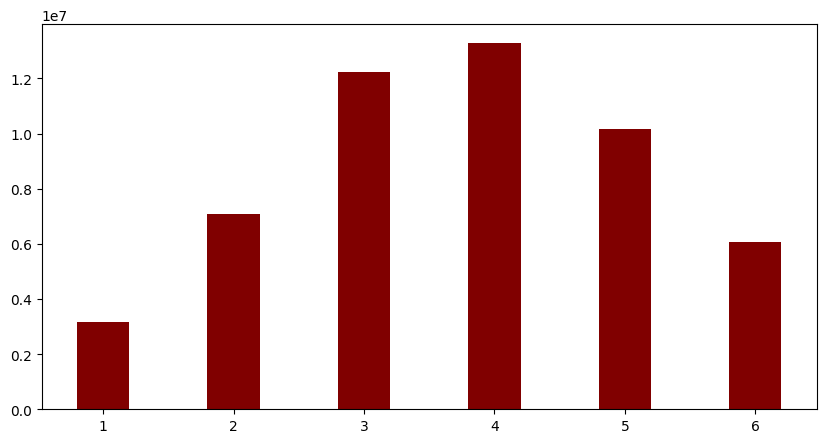

In [95]:
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(df['bedrooms'], df['price'], color ='maroon', 
        width = 0.4)

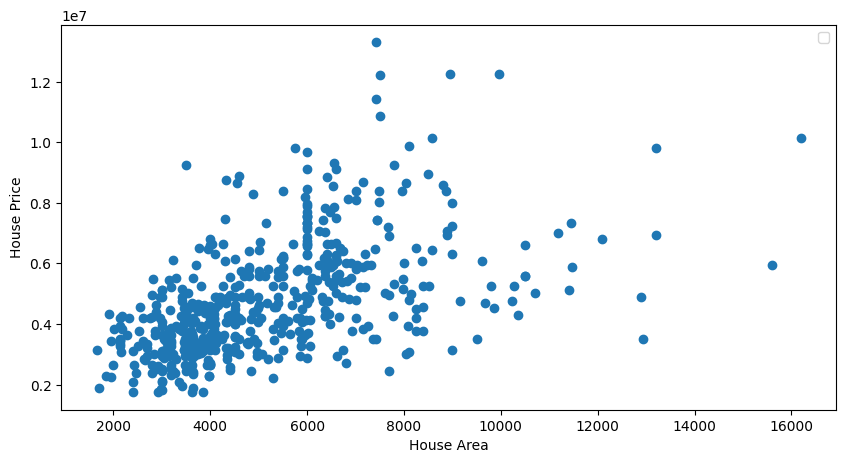

In [96]:
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.scatter(df['area'], df['price'])
plt.xlabel("House Area")
plt.ylabel("House Price")
plt.legend()

### An outlier is a data point that significantly differs from the other data points in a dataset. 
### It can be much higher or lower than the rest of the values. Outliers can occur due to variability in the data, 
### measurement errors, or experimental errors.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8e182d99d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8e182d9df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8e182d9730>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8e18265370>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8e18265610>],
 'means': []}

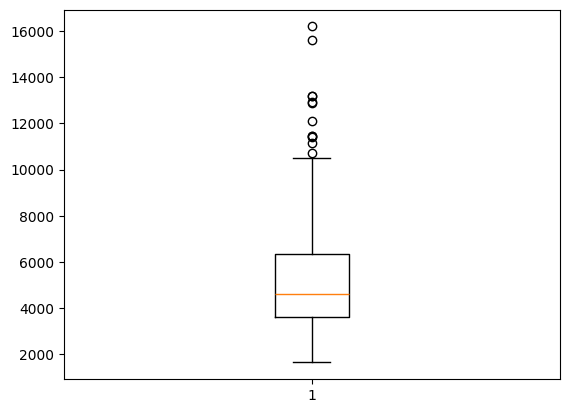

In [97]:
plt.boxplot(df['area'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8e1824e730>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8e1824eca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8e1824e490>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8e1825b220>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8e1825b4c0>],
 'means': []}

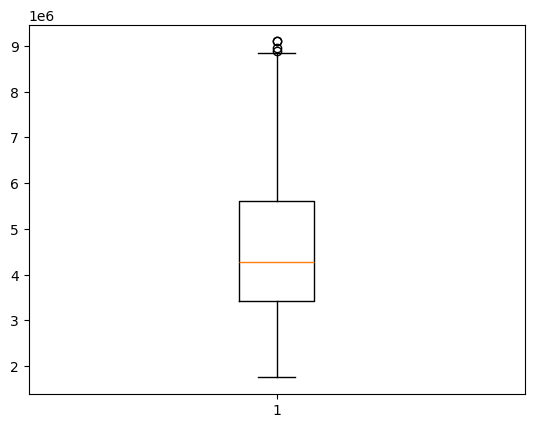

In [98]:
# Dealing with outliers in price 
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]

plt.boxplot(df.price)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8e181c2ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8e181c2fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8e181c2820>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8e181d0580>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8e181d0820>],
 'means': []}

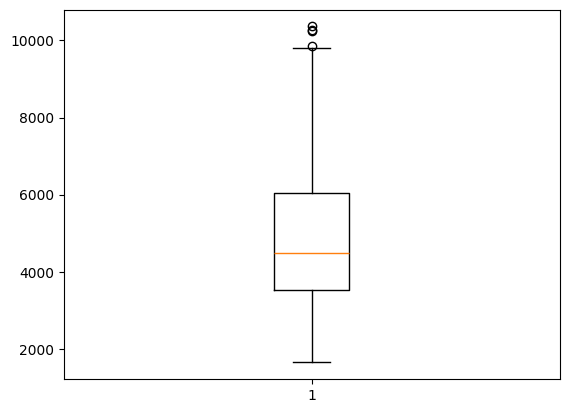

In [99]:
# Dealing with outliers in srea 

Q1 = df.area.quantile(0.25)
Q3 = df.area.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.area >= Q1 - 1.5*IQR) & (df.area <= Q3 + 1.5*IQR)]
plt.boxplot(df.area)

### NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, 
### along with a large collection of high-level mathematical functions to operate on these arrays. 

In [100]:
import numpy as np

### Scikit-learn is probably the most useful library for machine learning in Python. 
### The sklearn library contains a lot of efficient tools for machine learning and statistical modeling including 
### classification, regression, & clustering

In [101]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge

In [102]:
data = df.copy()

In [103]:
data[['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']].head()

,furnishingstatus,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
15,semi-furnished,yes,no,yes,no,no,no
16,unfurnished,yes,yes,yes,no,yes,yes
17,furnished,yes,no,no,no,yes,no
18,furnished,yes,yes,no,no,yes,no
19,semi-furnished,yes,no,no,no,yes,yes


## One Hot Encoding

In [104]:
status = pd.get_dummies(data[['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']], drop_first = True)

In [105]:
status.head()

,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
15,True,False,True,False,True,False,False,False
16,False,True,True,True,True,False,True,True
17,False,False,True,False,False,False,True,False
18,False,False,True,True,False,False,True,False
19,True,False,True,False,False,False,True,True


In [106]:
data = pd.concat([data, status], axis = 1)

In [107]:
data.drop(['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'], axis = 1, inplace = True)

In [108]:
data.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
15,9100000,6000,4,1,2,2,True,False,True,False,True,False,False,False
16,9100000,6600,4,2,2,1,False,True,True,True,True,False,True,True
17,8960000,8500,3,2,4,2,False,False,True,False,False,False,True,False
18,8890000,4600,3,2,2,2,False,False,True,True,False,False,True,False
19,8855000,6420,3,2,2,1,True,False,True,False,False,False,True,True


In [109]:
X = data.drop(['price'],axis=1)
y = data['price']

In [110]:
X.columns = X.columns.str.replace('/', '_')
X.columns = X.columns.str.replace(' ', '_')
X.columns = X.columns.str.replace('-', '_')

In [111]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [112]:
scaler = MinMaxScaler()

In [113]:
X_train.head()

,area,bedrooms,bathrooms,stories,parking,furnishingstatus_semi_furnished,furnishingstatus_unfurnished,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
338,3780,2,1,2,0,True,False,True,True,True,False,False,False
395,3600,6,1,2,1,False,True,True,False,False,False,False,False
38,6000,3,1,4,2,False,True,True,True,False,False,True,False
298,5800,3,1,1,2,True,False,True,False,False,True,False,False
326,4100,4,1,1,0,False,True,False,False,True,False,False,False


## Scaling

In [114]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [115]:
X_train_scaled

array([[0.24712844, 0.2       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.22624434, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.50469892, 0.4       , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.23088525, 0.4       , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.16707275, 0.2       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.5341687 , 0.6       , 0.5       , ..., 0.        , 0.        ,
        1.        ]])

## Model training

In [116]:
model = {
    'Random Forest Regressor' : RandomForestRegressor(),
    'Gradient Boost Regressor' : GradientBoostingRegressor(),
    'Lasso Reg' : Lasso(),
    'Ridge Reg' : Ridge()
    }
pred ={}

In [117]:
for name, model in model.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    pred[name]=y_pred

Results for Random Forest Regressor : 
Mean Square Erroe : 977678706690.0204
R2 Score : 0.6688170293269297


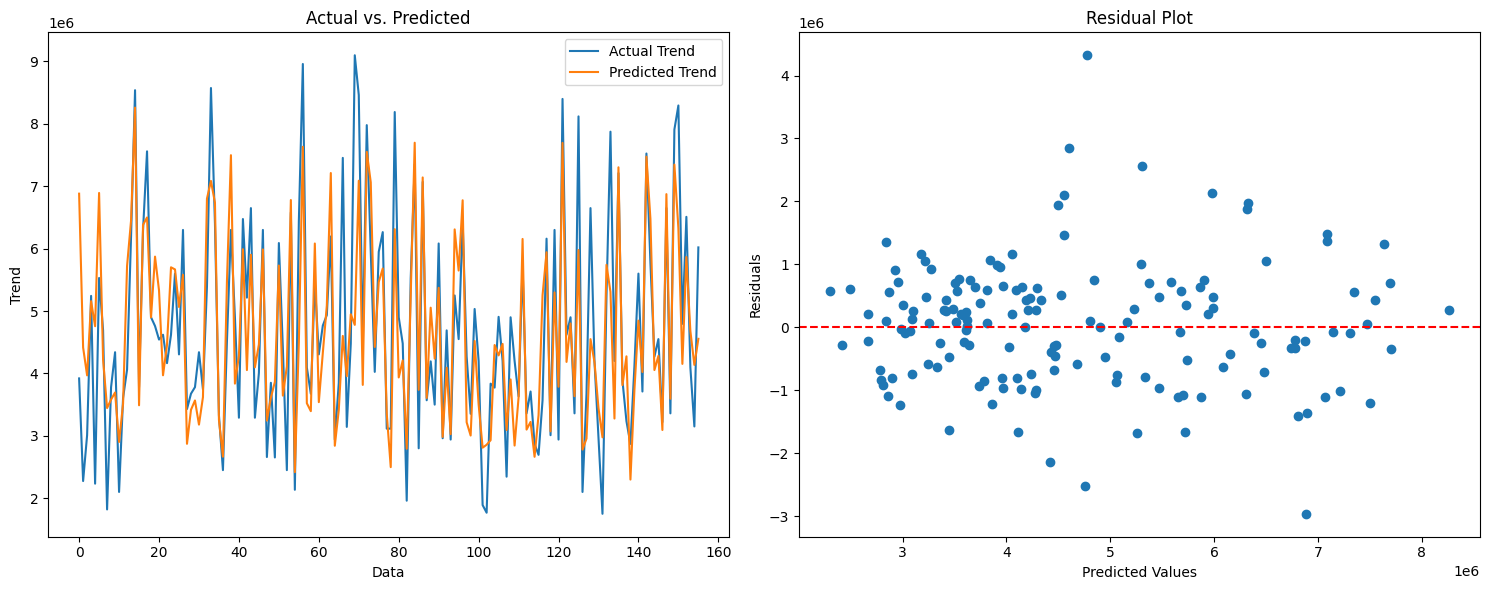

Results for Gradient Boost Regressor : 
Mean Square Erroe : 927218606008.5853
R2 Score : 0.685910094696756


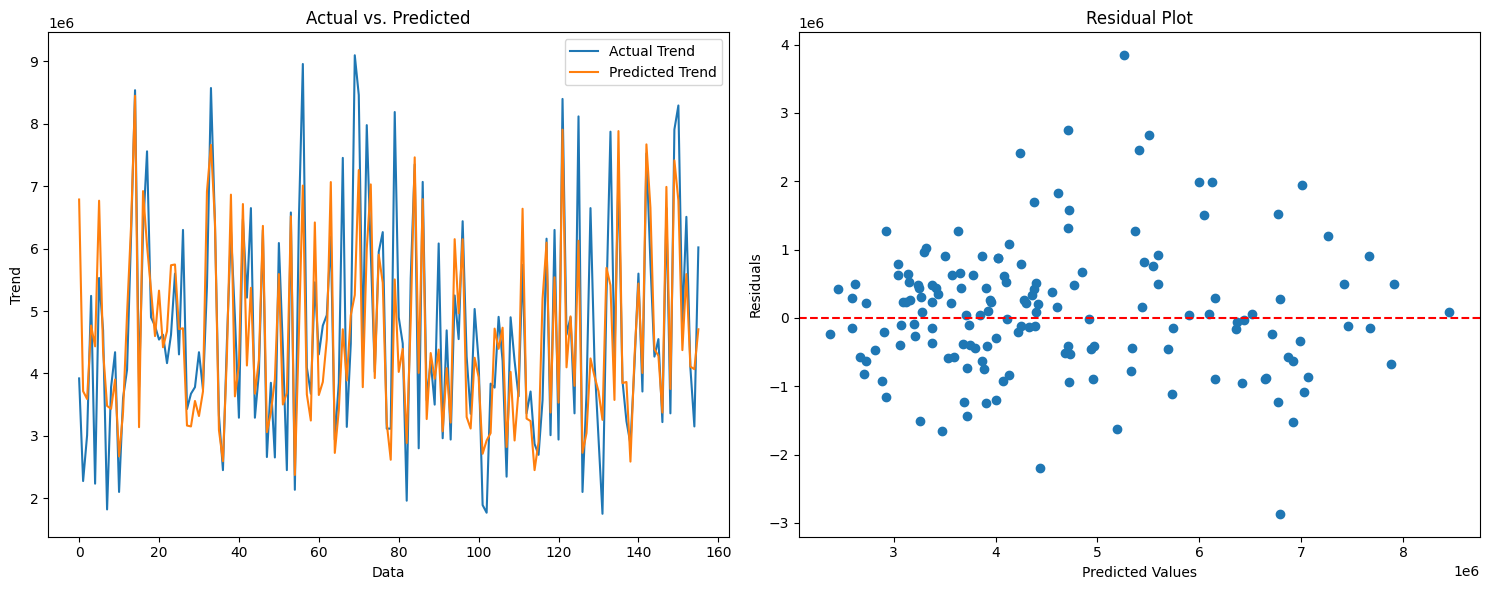

Results for Lasso Reg : 
Mean Square Erroe : 855741685449.5314
R2 Score : 0.7101224854579838


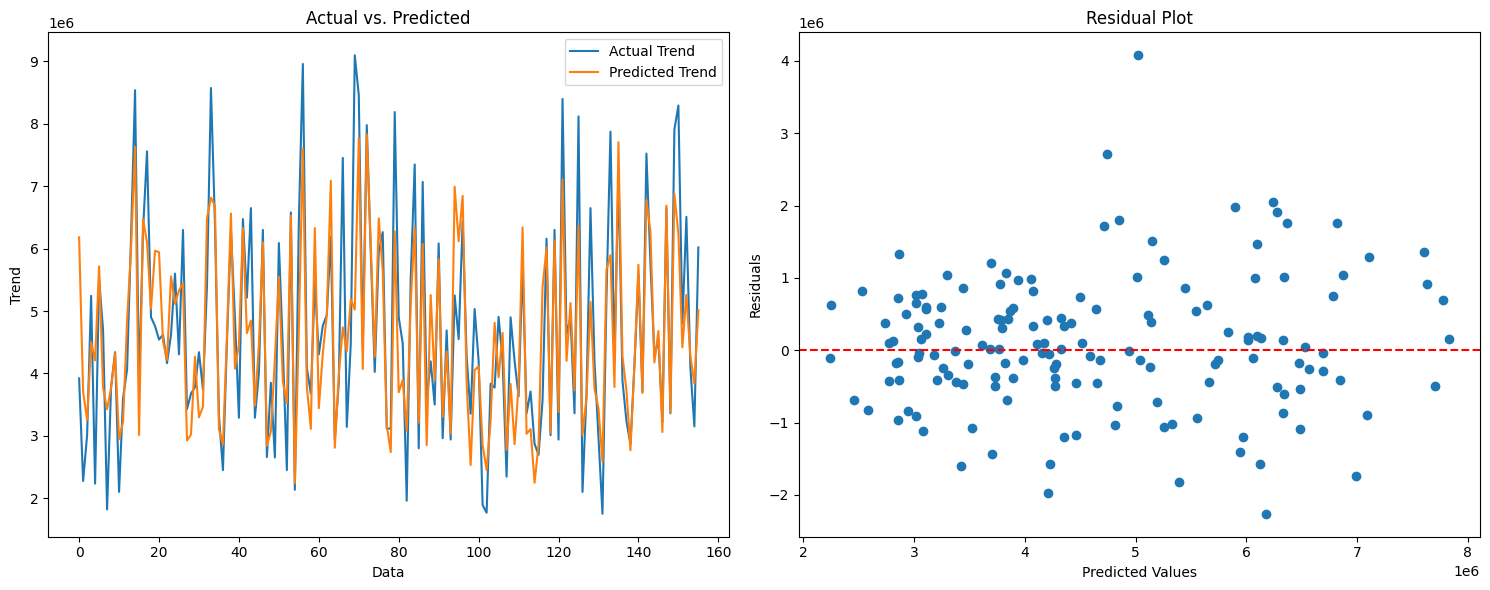

Results for Ridge Reg : 
Mean Square Erroe : 856959662079.8171
R2 Score : 0.709709902964504


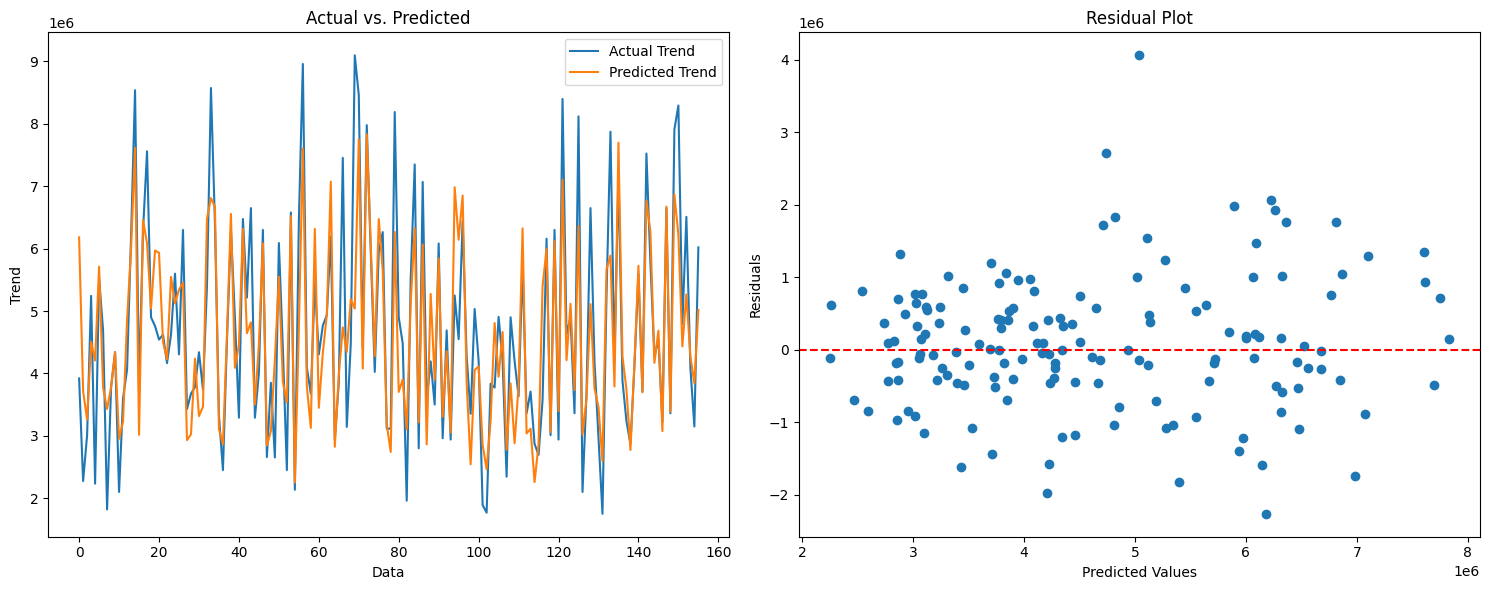

In [118]:
acc= {} 
for name, y_pred in pred.items():
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc[name] = r2
    print(f"Results for {name} : ")
    print (f"Mean Square Erroe : {mse}")
    print(f"R2 Score : {r2}")
    plt.figure(figsize=(15, 6))

# Plot Actual vs. Predicted values
    plt.subplot(1, 2, 1)
    plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
    plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Trend')
    plt.xlabel('Data')
    plt.ylabel('Trend')
    plt.legend()
    plt.title('Actual vs. Predicted')

    # Plot Residuals
    residuals = y_test - y_pred

    plt.subplot(1, 2, 2)
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')

    plt.tight_layout()
    plt.show()

In [119]:
data = pd.DataFrame.from_dict(acc, orient='index', columns=['Accuracy'])

In [120]:
data.head()

,Accuracy
Random Forest Regressor,0.668817
Gradient Boost Regressor,0.685910
Lasso Reg,0.710122
Ridge Reg,0.709710


In [121]:
model = Lasso()

In [122]:
X_train.columns = X_train.columns.str.upper()

In [123]:
X_test.columns = X_test.columns.str.upper()

In [124]:
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [125]:
y_train.name = 'PRICE'
y_test.name = 'PRICE'

In [126]:
y_pred_test = pd.Series(y_pred_test)
y_pred_train = pd.Series(y_pred_train)

In [127]:
y_pred_test.name = 'PREDICTED_PRICE'
y_pred_train.name = 'PREDICTED_PRICE'

In [128]:
type(y_train), type(y_test), type(y_pred_test)

(pandas.core.series.Series,
 pandas.core.series.Series,
 pandas.core.series.Series)

In [129]:
from fosforml import register_model

In [130]:
## registering the model in Fosfor Insight Designer.
register_model(
    model_obj=model, 
    session=my_session,
    x_train=X_train,
    y_train=y_train,
    x_test=X_test,
    y_test=y_test,
    y_pred=y_pred_test,
    source="Notebook",
    dataset_name="Housing.csv",
    #dataset_source="Snowflake",
    dataset_source="InMemory",
    name="House_Price_Predictor",
    description="Lasso_Model_House_Price_Predictor",
    flavour="sklearn",
    model_type="regression",
    conda_dependencies=["scikit-learn==1.3.2"]
)

Got error object of type 'NoneType' has no len() when trying to read default values from function: <function explained_variance_score.<locals>.explained_variance_score_anon_sproc at 0x7f8e5650ca60>. Proceeding without creating optional arguments


Calculating build time metrics

Progress: ██████████████████                                                     25.0%


The version of package 'scikit-learn' in the local environment is 1.3.2, which does not fit the criteria for the requirement 'scikit-learn==1.3.*'. Your UDF might not work when the package version is different between the server and your local environment.
The version of package 'snowflake-snowpark-python' in the local environment is 1.21.0, which does not fit the criteria for the requirement 'snowflake-snowpark-python'. Your UDF might not work when the package version is different between the server and your local environment.


Calculating build time metrics

Progress: ███████████████████████████████████                                    50.0%
Calculating build time metrics

Progress: ████████████████████████████████████████████████████                   75.0%
Calculating build time metrics

Progress: ██████████████████████████████████████████████████████████████████████ 100.0%


"Model 'MODEL_4CAC9B7E_5794_4BA1_8E11_719ABA32ECA5_FDC_HOUSE_PRICE_PREDICTOR' registered successfully."